In [161]:
#coding:utf-8
%reload_ext autoreload 
%autoreload 2
import os
import sys
project_basedir = '..'
sys.path.append(project_basedir)
from config import conf
import json
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
plt.style.use('ggplot')
%matplotlib inline

In [162]:
validate_dirs = os.listdir(conf.validate_dir)
validate_dirs = [i for i in validate_dirs if i != '_blank']
validate_dirs = sorted(validate_dirs)
validate_dirs = [os.path.join(conf.validate_dir,i) for i in validate_dirs]

In [163]:
def add_score(onedic,key,point):
    onedic.setdefault(key,0)
    onedic[key] += point
def cal_points(gameplays):
    point_dic = {}
    for onegame in gameplays:
        if onegame[-3:] != 'cbf':
            continue
        winner = onegame.split('_')[-1].split('.')[0]
        player1 = onegame.split('_')[-2].split('-')[0]
        player2 = onegame.split('_')[-2].split('-')[1]
        assert(winner in ['w','b','peace'])
        if winner == 'w':
            add_score(point_dic,player1,1)
            add_score(point_dic,player2,0)
        elif winner == 'b':
            add_score(point_dic,player1,0)
            add_score(point_dic,player2,1)
        elif winner == 'peace':
            add_score(point_dic,player1,0.5)
            add_score(point_dic,player2,0.5)
            add_score(point_dic,'peace',1)
        else:
            raise
    return point_dic

In [164]:
game_numbers = [0]
game_numbers_identity = [0]
elu_points = [0]
validate_games = [0]
win_rate = [0]
dates = ['start']
peace_rates = [0]
delta_elo = [0]
for one_dir in validate_dirs:
    one_date = one_dir.split('/')[-1]
    gameplays = os.listdir(one_dir)
    pointcdic = cal_points(gameplays)
    game_num = len(gameplays)
    
    try:
        gn = len(os.listdir(os.path.join(conf.history_selfplay_dir,one_date.replace('_noup',''))))
    except:
        gn = 0
    if game_num == 0:
        continue
        
    old_score = pointcdic.get('oldnet',0) / game_num
    peace_rate = pointcdic.get('peace',0) / game_num
    
    if old_score == 0:
        continue
        
    game_numbers.append(game_numbers[-1] + gn)
    game_numbers_identity.append(gn)
    
    
    elo = np.log10(1 / old_score - 1) * 400
    if one_date >= '2018-08-27_22-13-25' and one_date < '2018-09-16_17-00-24' and elo < 0:
        elo = 0
    #elif one_date >= '2018-09-16_17-00-24' and elo < -100:
    #    elo = 0
    elu_points.append(elu_points[-1] + elo)
    validate_games.append(len(gameplays))
    win_rate.append(1 - old_score)
    dates.append(one_date)
    peace_rates.append(peace_rate)
    delta_elo.append(elo)

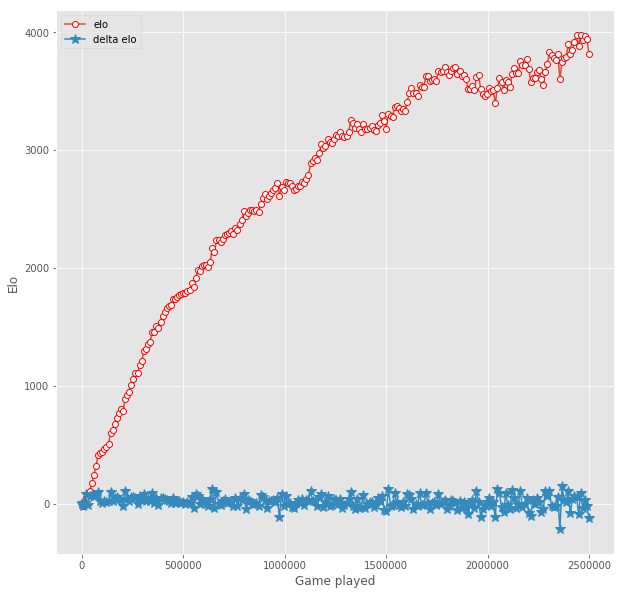

In [165]:
plt.figure(figsize=(10,10))
plt.plot(game_numbers,elu_points,marker='o',mec='r',mfc='w',label='elo')
plt.plot(game_numbers,delta_elo,marker='*',ms=10,label='delta elo')
plt.legend()
plt.xlabel("Game played")
plt.ylabel("Elo")

In [166]:
pd.DataFrame({
    'dates':dates,
    'game_numbers':game_numbers,
    'game_numbers_identity':game_numbers_identity,
    'elu_points':elu_points,
    'validate_games':validate_games,
    'win_rate':win_rate,
    'peace_rates':peace_rates,
    'delta_elo':delta_elo,
    '上位情况':[('pending' if i is None else "上位") for i in delta_elo]
})[-10:]

,dates,delta_elo,elu_points,game_numbers,game_numbers_identity,peace_rates,validate_games,win_rate,上位情况
235,2018-10-23_04-00-13_noup,-82.421793,3815.317326,2407715,10272,0.091324,219,0.383562,上位
236,2018-10-23_07-40-13_noup,35.020327,3850.337652,2417872,10157,0.178082,219,0.550228,上位
237,2018-10-23_11-30-13_noup,62.538880,3912.876532,2427988,10116,0.173516,219,0.589041,上位
238,2018-10-23_15-30-13_noup,59.267431,3972.143963,2438208,10220,0.136986,219,0.584475,上位
239,2018-10-23_19-50-13_noup,-90.858036,3881.285928,2448329,10121,0.242009,219,0.372146,上位
240,2018-10-24_00-00-13_noup,94.261557,3975.547485,2458648,10319,0.232877,219,0.632420,上位
241,2018-10-24_04-10-14_noup,-41.443510,3934.103975,2468899,10251,0.114155,219,0.440639,上位
242,2018-10-24_08-40-13_noup,28.620915,3962.724890,2479200,10301,0.105023,219,0.541096,上位
243,2018-10-24_12-50-14_noup,-20.648306,3942.076584,2489459,10259,0.136986,219,0.470320,上位
244,2018-10-24_16-50-13_noup,-125.927312,3816.149272,2499481,10022,0.115789,190,0.326316,上位


In [167]:
!ls -l ../data/distributed/ | wc -l 

5678


In [168]:
!ls -l ../data/distributed/ | grep peace | wc -l

9


In [169]:
!ls -l ../data/distributed/ | grep '_w'| wc -l 

2863


In [170]:
!ls -l ../data/distributed/ | grep '_b'| wc -l 

2806


In [171]:
! date

2018年 10月 24日 星期三 19:03:11 CST


In [172]:
!nvidia-smi

Wed Oct 24 19:03:11 2018       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 384.111                Driver Version: 384.111                   |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce GTX 108...  Off  | 00000000:05:00.0 Off |                  N/A |
| 54%   84C    P2   163W / 250W |   8132MiB / 11172MiB |     76%      Default |
+-------------------------------+----------------------+----------------------+
|   1  GeForce GTX 108...  Off  | 00000000:42:00.0 Off |                  N/A |
| 92%   90C    P2   239W / 250W |   6074MiB / 11172MiB |     87%      Default |
+-------------------------------+----------------------+----------------------+
        